In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib
import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
#plt.style.use('fivethirtyeight')
import statsmodels.api as sm

matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'




<Figure size 640x480 with 0 Axes>

In [4]:
df=pd.read_csv("D:/UEA/Kaggle Practice/SalesForecasting/train.csv")

In [5]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
#Time series Forecasting for furniture sales

In [6]:
df_furniture=df.loc[df['Category']=='Furniture']

In [7]:
df_furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
10,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,9787,US-2015-114377,05/11/2015,05/11/2015,Same Day,BG-11035,Barry Gonzalez,Consumer,United States,Hampton,Virginia,23666.0,South,FUR-CH-10004754,Furniture,Chairs,"Global Stack Chair with Arms, Black",149.9000
9787,9788,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320
9788,9789,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.5580
9790,9791,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.2460


In [8]:
df_furniture.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [ ]:
#There is no null object in the dataframe.

In [34]:
df_furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 9792
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2078 non-null   int64  
 1   Order ID       2078 non-null   object 
 2   Order Date     2078 non-null   object 
 3   Ship Date      2078 non-null   object 
 4   Ship Mode      2078 non-null   object 
 5   Customer ID    2078 non-null   object 
 6   Customer Name  2078 non-null   object 
 7   Segment        2078 non-null   object 
 8   Country        2078 non-null   object 
 9   City           2078 non-null   object 
 10  State          2078 non-null   object 
 11  Postal Code    2076 non-null   float64
 12  Region         2078 non-null   object 
 13  Product ID     2078 non-null   object 
 14  Category       2078 non-null   object 
 15  Sub-Category   2078 non-null   object 
 16  Product Name   2078 non-null   object 
 17  Sales          2078 non-null   float64
dtypes: float

In [9]:
#Typecasting date time column as datatime64
df_furniture['Order Date']=df_furniture['Order Date'].astype({'Order Date':'datetime64'})

In [10]:
df_furniture['Order Date'].min(),df_furniture['Order Date'].max()

(Timestamp('2015-01-03 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [11]:
# So we have three years of sales data for furniture

In [12]:
#terate Over a series of dataframe  
months=[]
for index,value in df_furniture['Order Date'].items():
    
    if value.year==2017:
        months.append(value.month)
        #print(value.month)

In [38]:
#There are different number of data for each day.
print(len(months)/30)

18.233333333333334


#We can take the average sales value of a month as sales value for that month.

In [15]:
required_columns=['Order Date','Sales']

In [16]:
#Keeping time data and sales data in the new dataframe and named it as furniture
furniture=df_furniture[required_columns]

In [17]:
df_furniture['Order Date']

0      2017-08-11
1      2017-08-11
3      2016-11-10
5      2015-09-06
10     2015-09-06
          ...    
9786   2015-05-11
9787   2018-03-27
9788   2018-03-27
9790   2018-03-27
9792   2015-05-21
Name: Order Date, Length: 2078, dtype: datetime64[ns]

In [18]:
#group sales by same date by adding all the sales for the same day. And reseting index.
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()


In [19]:
#For time series data, date time object needs to be the index.
furniture = furniture.set_index('Order Date')


In [20]:
furniture.index

DatetimeIndex(['2015-01-03', '2015-01-06', '2015-01-08', '2015-01-11',
               '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-16',
               '2015-01-19', '2015-01-20',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=877, freq=None)

In [21]:
#Resampling the data by month and using the mean value
# https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4
data=furniture['Sales'].resample('MS').mean()

In [22]:
type(data)

pandas.core.series.Series

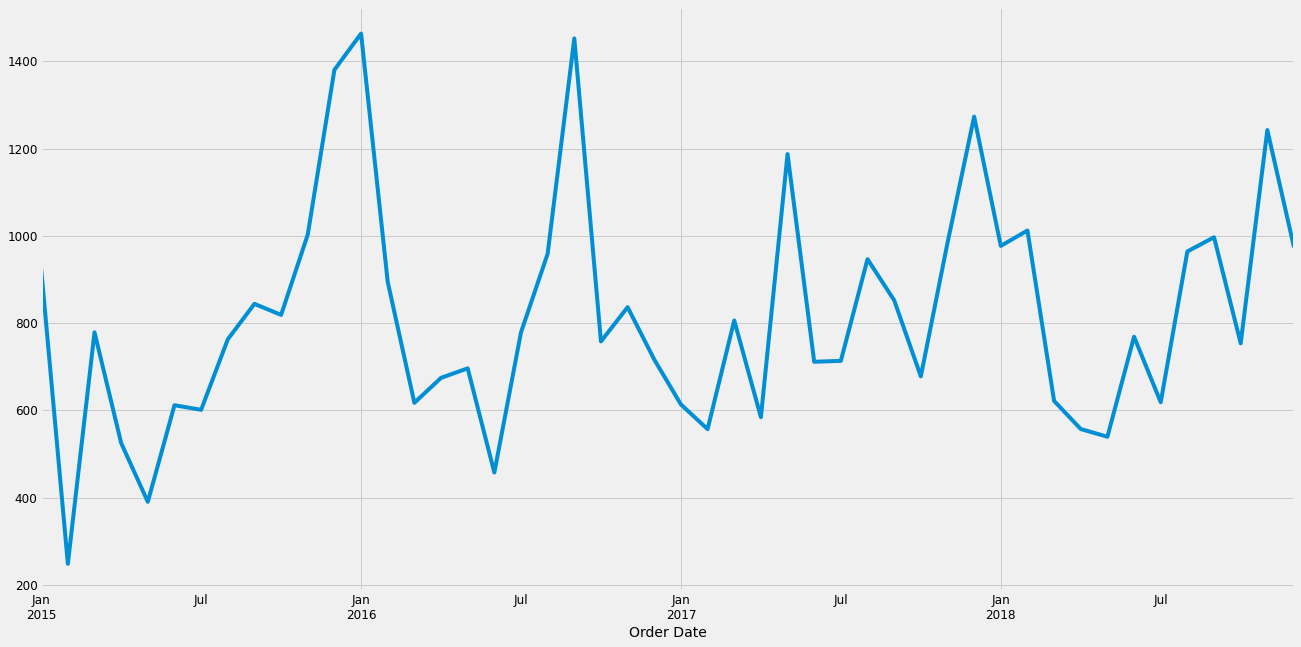

In [50]:
data.plot(figsize=(20,10))
plt.show()

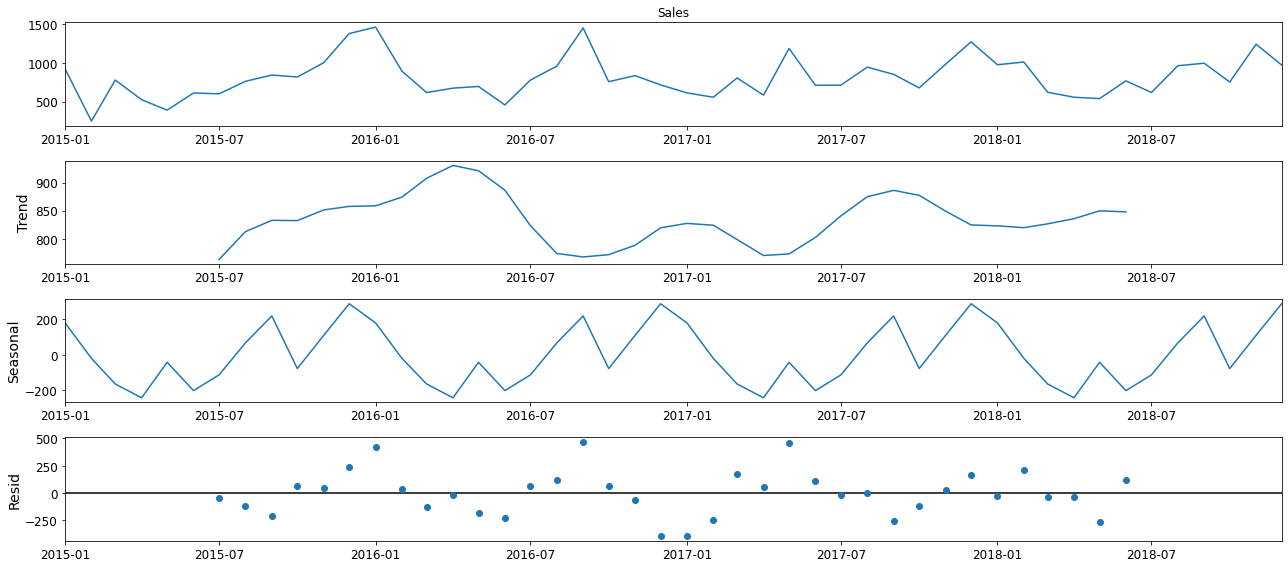

In [24]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 18, 8
matplotlib.rcParams['figure.figsize']=18,8
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
seasonal=decomposition.seasonal

plt.show()

#  SARIMA MODEL For Sales Forecasting

In [54]:
#defining the range for parameter values for Our ARIMA Model
p=d=q=range(0,2)

In [56]:
#It return the cartesian product of all the iterators passed to the product function
pdq=list(itertools.product(p,d,q))


In [57]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [64]:
# Adding period of seasonality in the data, number of periods in each season. From the above plot( break down of season trend , and noise). We can see that data is seasonal( yearly) and since the data is monthly so number of periods in each season is 12.
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [26]:
seasonal

Order Date
2015-01-01    179.574146
2015-02-01    -20.189533
2015-03-01   -164.634916
2015-04-01   -242.136968
2015-05-01    -42.218669
2015-06-01   -201.743674
2015-07-01   -113.296694
2015-08-01     66.875239
2015-09-01    218.684558
2015-10-01    -77.631056
2015-11-01    109.324370
2015-12-01    287.393198
2016-01-01    179.574146
2016-02-01    -20.189533
2016-03-01   -164.634916
2016-04-01   -242.136968
2016-05-01    -42.218669
2016-06-01   -201.743674
2016-07-01   -113.296694
2016-08-01     66.875239
2016-09-01    218.684558
2016-10-01    -77.631056
2016-11-01    109.324370
2016-12-01    287.393198
2017-01-01    179.574146
2017-02-01    -20.189533
2017-03-01   -164.634916
2017-04-01   -242.136968
2017-05-01    -42.218669
2017-06-01   -201.743674
2017-07-01   -113.296694
2017-08-01     66.875239
2017-09-01    218.684558
2017-10-01    -77.631056
2017-11-01    109.324370
2017-12-01    287.393198
2018-01-01    179.574146
2018-02-01    -20.189533
2018-03-01   -164.634916
2018-04-01   -

In [65]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [29]:
#Checking for stationarity of time series using adfuller test
from statsmodels.tsa.stattools import adfuller
# import numpy as np
# dftest = adfuller(seasonal)
# adf = dftest[0]
# pvalue = dftest[1]
# critical_value = dftest[4]['5%']
# if (pvalue < 0.05) and (adf < critical_value):
#     print("Pvalue is: "+ str(pvalue)+ 'The series is stationary')
# else:
#     print('The series is NOT stationary')
adf = adfuller(data,12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")    
    
    


Statistics analysis

Statistic Test :  -4.397169903637623
p-value :  0.0003002746491274642
# n_lags :  4
No of observation:  43
 critical value 1% : -3.5925042342183704
 critical value 5% : -2.931549768951162
 critical value 10% : -2.60406594375338


In [68]:
# Test shows that time series is stationary, but from the plot of time series we can see that there is some seasonality in the data.

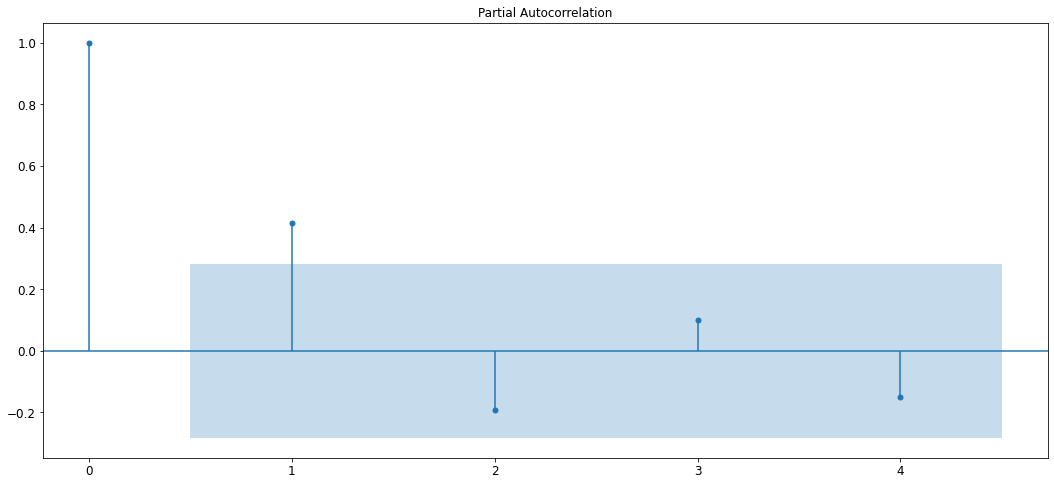

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(seasonal, lags =4)
plt.show()

In [ ]:
# ADF Test before differencing

from statsmodels.tsa.stattools import adfuller 
df_resample = df.resample('M').sum()
